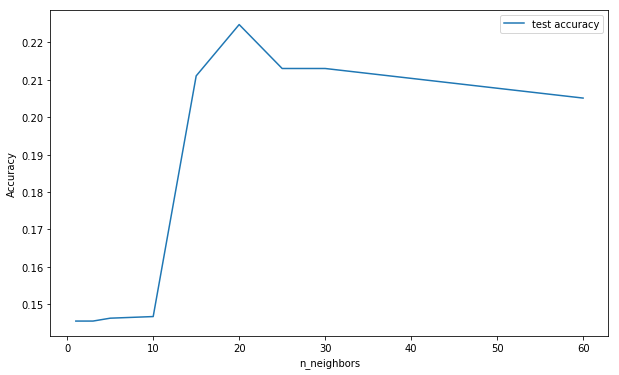

In [4]:
# Use http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
%matplotlib inline
 
# Experimental design --------------------------------------------------------------------------------------
k_lst = [1, 3, 5, 10, 15, 20, 25, 30, 60] # factor
# k_lst = range(1, 20)
folds_num = 10
train_test_p = 0.3
weights_in = 'distance' #'uniform' #  #  #
 
 
# Load libraries -------------------------------------------------------------------------------------------
import os, platform, sys
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
 
# iris
# data = datasets.load_iris()
 
# boston
data = datasets.load_boston()
# rabimo pomnožiti z 10 da dobimo v target cela števila
data["target"] = data.target * 10
 
# breast
# data = datasets.load_breast_cancer()
 
## Flatten experiment ---------------------------------------------------------------------------------------
acc_lst = []
 
for k in k_lst:
 
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=train_test_p, random_state=0)
    # Train classifier
    clf = neighbors.KNeighborsClassifier(k, weights=weights_in)
    clf.fit(X_train, y_train)
    # Cross validate
    scores = cross_val_score(clf, data.data, data.target, cv=folds_num)     
    # store mean of cross validation scores
    acc_lst.append(scores.mean())
   
acc_aver = pd.Series(acc_lst).mean()
 
# Plot figures
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(k_lst, acc_lst, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()